In [113]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import plotly.express as px
import plotly

import plotly.graph_objects as go

# Let's try clustering

In [114]:
customers_scaled = pd.read_csv('../data/customers_scaled.csv', index_col=0)
customers_scaled

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
0,0.181399,0.434211,0.555556,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.045818,0.763158,0.111111,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.128665,0.328947,0.888889,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.330667,0.539474,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.309066,0.605263,1.000000,0.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0.183043,0.565789,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,0.425231,0.486842,0.000000,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,0.104747,0.315789,0.777778,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# kmeans first

def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()


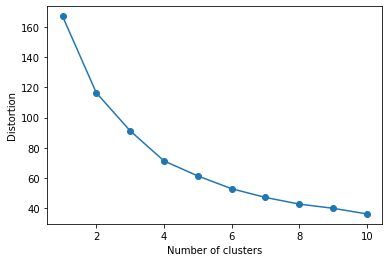

In [116]:
plot_distortion(customers_scaled.iloc[:,:4], max_clusters = 10)

In [117]:
# set up k_means params
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

In [118]:
# fit and predict
y_km = km.fit_predict(customers_scaled.iloc[:,:4])
y_km

array([3, 1, 3, 1, 3, 2, 0, 3, 2, 3, 3, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 1,
       3, 3, 2, 1, 0, 3, 3, 1, 1, 1, 2, 3, 1, 2, 0, 1, 3, 0, 0, 2, 1, 2,
       1, 1, 1, 0, 3, 1, 0, 0, 3, 3, 3, 1, 1, 3, 1, 3, 2, 0, 0, 1, 3, 0,
       3, 2, 0, 0, 1, 2, 3, 1, 3, 3, 0, 1, 0, 3, 1, 3, 1, 0, 3, 2, 1, 1,
       1, 3, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3,
       0, 3, 3, 1, 2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 0, 3, 0, 1, 2, 0, 3, 1,
       0, 1, 3, 0, 3, 3, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 1, 2, 0, 1, 1, 1,
       1, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 2, 1, 0, 1, 3, 1, 3, 3, 1, 0, 0,
       3, 3, 3, 1, 3, 0, 3, 0, 3, 1, 1, 2, 3, 2, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 3, 3, 0, 0, 1, 3, 0, 1, 0, 3, 0, 0, 3, 3, 0, 2, 0, 2, 1, 2,
       3, 2, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 2, 0,
       1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 1, 2, 3, 2, 2,
       0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 3, 2, 1, 1, 1, 0, 0, 3, 3, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 1, 3, 0, 1, 3, 0, 0, 0,

In [119]:
customers_scaled['cluster_nogeo'] = y_km
customers_scaled

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita,cluster_nogeo
0,0.181399,0.434211,0.555556,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0.045818,0.763158,0.111111,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.128665,0.328947,0.888889,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0.330667,0.539474,0.333333,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.309066,0.605263,1.000000,0.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
743,0.183043,0.565789,0.666667,0.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
744,0.425231,0.486842,0.000000,0.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
745,0.104747,0.315789,0.777778,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [120]:
radar_scaled = customers_scaled.groupby('cluster_nogeo').mean()
radar_scaled

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
cluster_nogeo,,,,,,,,,,,,,,,,,,,,,
0,0.047311,0.086466,0.365079,0.019704,0.009852,0.009852,0.004926,0.000000,0.014778,0.009852,...,0.000000,0.009852,0.009852,0.004926,0.014778,0.004926,0.009852,0.000000,0.004926,0.009852
1,0.185363,0.565649,0.208038,0.042553,0.005319,0.010638,0.000000,0.000000,0.005319,0.015957,...,0.021277,0.010638,0.005319,0.005319,0.010638,0.010638,0.000000,0.000000,0.010638,0.000000
2,0.221601,0.332420,0.325617,0.509722,0.013889,0.027778,0.000000,0.013889,0.034722,0.013889,...,0.013889,0.006944,0.013889,0.000000,0.006944,0.000000,0.020833,0.000000,0.000000,0.006944
3,0.195338,0.556542,0.774633,0.100943,0.009434,0.009434,0.000000,0.000000,0.009434,0.004717,...,0.014151,0.009434,0.009434,0.000000,0.004717,0.018868,0.018868,0.004717,0.014151,0.000000


In [121]:
def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i,:4].values,
                                        theta=data.columns[:4],
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

In [122]:
plotRadarChart(radar_scaled.iloc[:,:4], "Demographic segments, no geography")

# Let's try and use the geo data

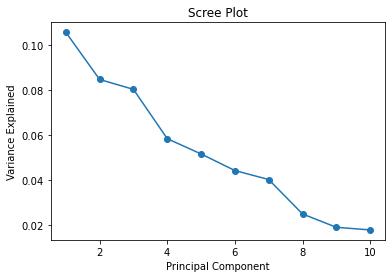

In [123]:
from sklearn.decomposition import PCA

# We need PCA to make the cities usable, how many PCs?

def screePlot(data, n_components=10):
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit(data)
    pca_fit

    PC_values = np.arange(pca.n_components_) + 1
    PC_values

    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

screePlot(customers_scaled.iloc[:,:-1])

In [124]:
# plot with 8 PCs

n_components = 8

pca = PCA(n_components=n_components)
pc_columns = []
for component in range(n_components):
    pc_columns.append('PC' + str(component+1))
        
principal_components = pd.DataFrame(pca.fit_transform(customers_scaled.iloc[:,:-1]), 
                                    columns=pc_columns)
principal_components


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.043774,-0.010050,-0.191389,-0.062497,-0.027838,0.081206,-0.055884,-0.042725
1,-0.496229,0.531344,0.470685,-0.017131,0.492024,-0.223395,-0.068502,0.049284
2,-0.512154,0.832721,0.040898,0.126137,-0.156177,-0.204194,0.100797,0.022958
3,-0.510299,0.615113,0.375217,0.058960,0.280734,-0.147680,0.012730,0.029205
4,0.843439,0.552440,-0.263085,0.211198,-0.037215,0.289218,0.135774,-0.026279
...,...,...,...,...,...,...,...,...
742,-0.530895,0.713065,0.228901,0.138774,-0.102082,-0.032804,0.077165,0.007484
743,0.838460,0.377217,-0.007636,0.122910,0.032510,0.067954,0.066605,0.001524
744,-0.069015,-0.276394,0.227366,-0.079117,0.279485,0.327479,-0.127922,-0.078619
745,-0.038148,0.076289,-0.327866,-0.072821,-0.228656,-0.133619,-0.027327,-0.024916


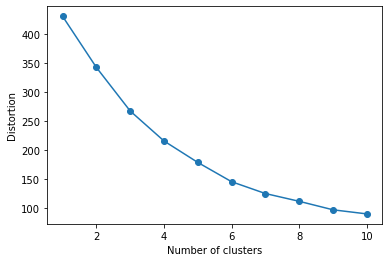

In [125]:
plot_distortion(principal_components, max_clusters = 10)

In [126]:
# set up k_means params
km = KMeans(n_clusters=4,
            n_init=10,
            random_state=0)

In [127]:
y_km = km.fit_predict(principal_components)
y_km

array([0, 2, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 3, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 3, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 3, 2,
       0, 1, 0, 2, 0, 0, 0, 1, 3, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0,
       0, 0, 0, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 0,
       0, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 3, 0, 0,
       0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 0,
       3, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 3, 0, 0, 3, 1, 0, 3, 1, 0,

In [128]:
principal_components['cluster_wgeo'] = y_km
principal_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster_wgeo
0,-0.043774,-0.010050,-0.191389,-0.062497,-0.027838,0.081206,-0.055884,-0.042725,0
1,-0.496229,0.531344,0.470685,-0.017131,0.492024,-0.223395,-0.068502,0.049284,2
2,-0.512154,0.832721,0.040898,0.126137,-0.156177,-0.204194,0.100797,0.022958,2
3,-0.510299,0.615113,0.375217,0.058960,0.280734,-0.147680,0.012730,0.029205,2
4,0.843439,0.552440,-0.263085,0.211198,-0.037215,0.289218,0.135774,-0.026279,1
...,...,...,...,...,...,...,...,...,...
742,-0.530895,0.713065,0.228901,0.138774,-0.102082,-0.032804,0.077165,0.007484,2
743,0.838460,0.377217,-0.007636,0.122910,0.032510,0.067954,0.066605,0.001524,1
744,-0.069015,-0.276394,0.227366,-0.079117,0.279485,0.327479,-0.127922,-0.078619,0
745,-0.038148,0.076289,-0.327866,-0.072821,-0.228656,-0.133619,-0.027327,-0.024916,0


In [129]:
radar_scaled_pca = principal_components.groupby('cluster_wgeo').mean()
radar_scaled_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
cluster_wgeo,,,,,,,,
0,-0.055377,-0.101407,-0.087080,-0.123560,-0.019826,0.025039,-0.027606,-0.006272
1,0.820482,0.234847,0.215327,0.093419,-0.006315,-0.008602,0.040326,0.008502
2,-0.531080,0.622334,0.369465,0.108195,0.050162,-0.043062,0.043774,0.012484
3,-0.135889,-0.422769,-0.139523,0.797292,0.116010,-0.147939,0.114689,0.023399


In [130]:
def plotRadarChart(data,title):
    temp_list = []
    for i in range(len(data)):
        temp_list.append(go.Scatterpolar(
                                        r=data.iloc[i].values,
                                        theta=data.columns,
                                        name=str(data.index[i]),
                                        fill='toself'
        ))

    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                        showlegend = True, title=title)     
    fig = go.Figure(data = temp_list, layout = layout)     
    fig.show()

plotRadarChart(radar_scaled_pca, "PCA Demographic segments, w geography")

# Let's Conclude the Demographic segments

In [133]:
radar_scaled['cluster_nogeo'] = radar_scaled['cluster_nogeo'].astype(str)
radar_scaled


KeyError: 'cluster_nogeo'

In [134]:
radar_scaled

,income,age,years_with_bank,nbr_children,Albuquerque,Anaheim,Arlington,Atlanta,Austin,Baltimore,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
cluster_nogeo,,,,,,,,,,,,,,,,,,,,,
0,0.047311,0.086466,0.365079,0.019704,0.009852,0.009852,0.004926,0.000000,0.014778,0.009852,...,0.000000,0.009852,0.009852,0.004926,0.014778,0.004926,0.009852,0.000000,0.004926,0.009852
1,0.185363,0.565649,0.208038,0.042553,0.005319,0.010638,0.000000,0.000000,0.005319,0.015957,...,0.021277,0.010638,0.005319,0.005319,0.010638,0.010638,0.000000,0.000000,0.010638,0.000000
2,0.221601,0.332420,0.325617,0.509722,0.013889,0.027778,0.000000,0.013889,0.034722,0.013889,...,0.013889,0.006944,0.013889,0.000000,0.006944,0.000000,0.020833,0.000000,0.000000,0.006944
3,0.195338,0.556542,0.774633,0.100943,0.009434,0.009434,0.000000,0.000000,0.009434,0.004717,...,0.014151,0.009434,0.009434,0.000000,0.004717,0.018868,0.018868,0.004717,0.014151,0.000000


In [ ]:
for column in radar_scaled:
    fig = px.bar(radar_scaled, x="cluster_nogeo", y=column, color="cluster_nogeo", title=column)
    fig.show()


In [ ]:
fig = px.bar(radar_scaled, x="cluster", y="count", color="medal", title="Long-Form Input")

ValueError: All arguments should have the same length. The length of argument `y` is 4, whereas the length of  previously-processed arguments ['cluster'] is 747